# PROYECTO PLATAFORMA DE INTELIGENCIA COMERCIAL - SUMA SUPERMERCADO

El supermercado SUMA enfrenta una situación de bajas ventas sostenidas en los últimos meses.
A pesar de mantener una clientela habitual y una oferta de productos constante, las cifras de facturación entre julio y septiembre muestran una tendencia descendente que afecta directamente la rentabilidad del negocio.

Nuestro objetivo es desarrollar un modelo de análisis y segmentación de ventas basado en los tickets reales del supermercado SUMA, que permita identificar productos clave, detectar oportunidades de promoción y optimizar la estrategia de ventas para revertir la tendencia de bajas ventas.

# BLOQUE 1 - RECOMENDADOR EDA#1

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

total_data = pd.read_csv("tickets_trimestre_detalle.csv")
total_data.head()

,fecha,ticket,descripcion,articulo,cantidad,precio,total,margen
0,1/7/2025 09:01,25920001,PATATA GOURMET TRAD.FRITA,061444,1.0,2.15,2.15,19.674419
1,1/7/2025 09:01,25920001,GUSIFRIT F.RAVICH SAL 80G ...,079022,1.0,1.30,1.30,18.870769
2,1/7/2025 09:01,25920001,INFU. GOURMET TE ROJO 20B ...,037775,1.0,1.00,1.00,41.700000
3,1/7/2025 09:01,25920001,PROTEG.SLIP SECRETISIMA MAXI 52U ...,088217,1.0,2.29,2.29,41.414847
4,1/7/2025 09:01,25920001,CHAMPU MICADERM CAB.GRASO,088456,1.0,2.67,2.67,35.194757


Este código está cargando el archivo con los datos de ventas del supermercado y mostrando las primeras filas para que podamos ver cómo vienen los datos.

In [4]:
total_data["fecha_dt"] = pd.to_datetime(total_data["fecha"], dayfirst=True, errors="coerce")

Este código convierte la columna de fechas del archivo en un formato de fecha correcto, para poder trabajar mejor con días, meses o realizar análisis por tiempo.

In [5]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14982 entries, 0 to 14981
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fecha        14982 non-null  object        
 1   ticket       14982 non-null  object        
 2   descripcion  14982 non-null  object        
 3   articulo     14982 non-null  object        
 4   cantidad     14982 non-null  float64       
 5   precio       8728 non-null   float64       
 6   total        14982 non-null  float64       
 7   margen       14964 non-null  float64       
 8   fecha_dt     14982 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.0+ MB


Este código muestra un resumen general del conjunto de datos, indicando cuántas filas y columnas tiene, los tipos de datos en cada columna y si hay valores faltantes.

In [6]:
total_data.isnull().sum()

fecha             0
ticket            0
descripcion       0
articulo          0
cantidad          0
precio         6254
total             0
margen           18
fecha_dt          0
dtype: int64

Este código revisa cuántos valores faltantes hay en cada columna del conjunto de datos.

In [7]:
total_data.describe().T

,count,mean,min,25%,50%,75%,max,std
cantidad,14982.0,1.173891,0.054,1.0,1.0,1.0,55.0,1.169858
precio,8728.0,1.356735,0.0,0.69,1.0,1.67,30.0,1.362696
total,14982.0,1.514977,0.0,0.7,1.0,1.85,75.0,1.75556
margen,14964.0,25.681966,-32.363636,19.886792,25.2,32.4,100.0,10.099664
fecha_dt,14982,2025-08-09 15:49:57.008409856,2025-07-01 09:01:00,2025-07-12 19:20:00,2025-07-28 10:28:30,2025-09-11 11:52:30,2025-09-25 20:59:00,NaN


Este código muestra un resumen estadístico de las columnas numéricas, como el promedio, los valores mínimos, máximos y la dispersión de los datos.

In [8]:
total_data.duplicated().sum()
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13248 entries, 0 to 13247
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fecha        13248 non-null  object        
 1   ticket       13248 non-null  object        
 2   descripcion  13248 non-null  object        
 3   articulo     13248 non-null  object        
 4   cantidad     13248 non-null  float64       
 5   precio       7473 non-null   float64       
 6   total        13248 non-null  float64       
 7   margen       13230 non-null  float64       
 8   fecha_dt     13248 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 931.6+ KB


Este código revisa si hay filas repetidas en el conjunto de datos, las elimina para evitar duplicados y luego muestra nuevamente la información general del dataset ya limpio.

In [9]:
num_cols = total_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = total_data.select_dtypes(include=['object']).columns.tolist()

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

Numéricas: ['cantidad', 'precio', 'total', 'margen']
Categóricas: ['fecha', 'ticket', 'descripcion', 'articulo']


Este código separa las columnas del conjunto de datos en dos grupos: las que tienen números y las que tienen texto, para analizarlas más fácilmente por tipo.

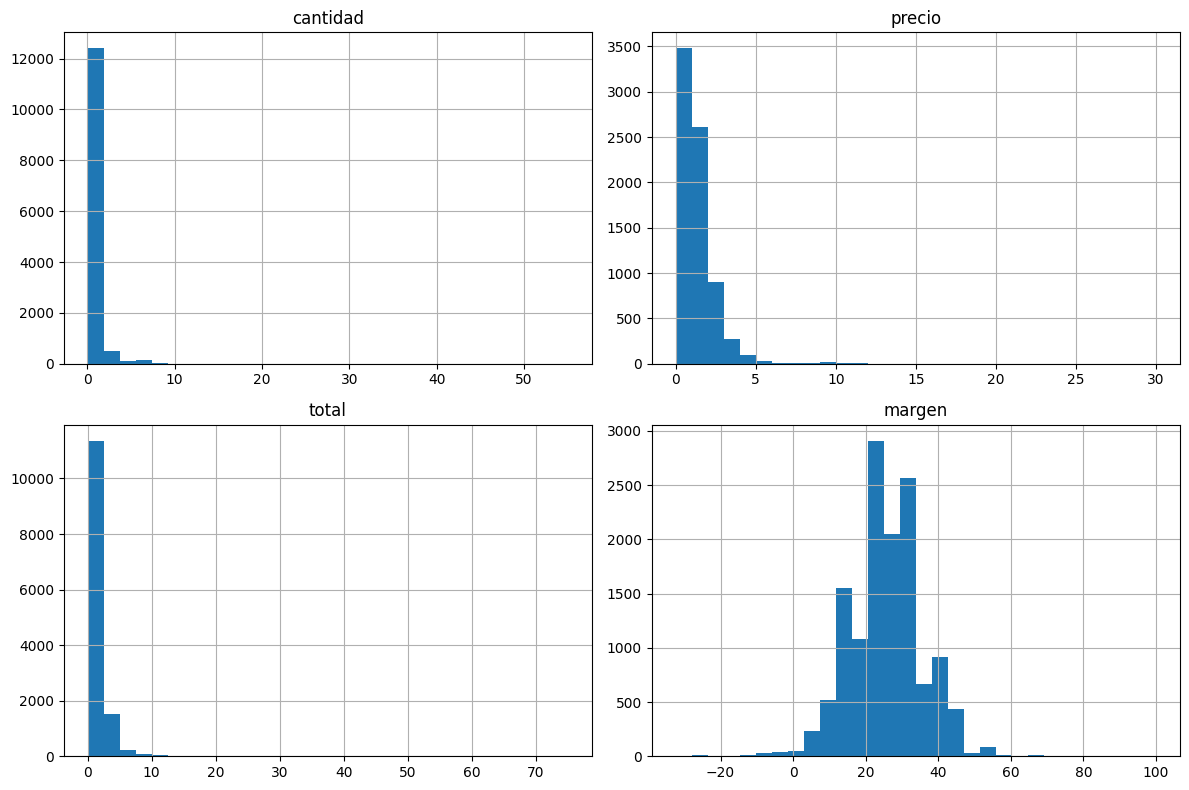

In [10]:
# Histogramas de variables numéricas
total_data[num_cols].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()



Este código crea gráficos de barras (histogramas) para mostrar cómo se distribuyen los valores numéricos del conjunto de datos y así detectar patrones o valores inusuales.

Estos gráficos muestran cómo se distribuyen las variables numéricas del supermercado. Se observa que la mayoría de las ventas tienen cantidades y totales bajos, mientras que los márgenes se concentran en valores intermedios, lo que indica que hay pocos productos con precios o ventas muy altos.

Algo que ya suponiamos y lo confirmamos con datos reales.

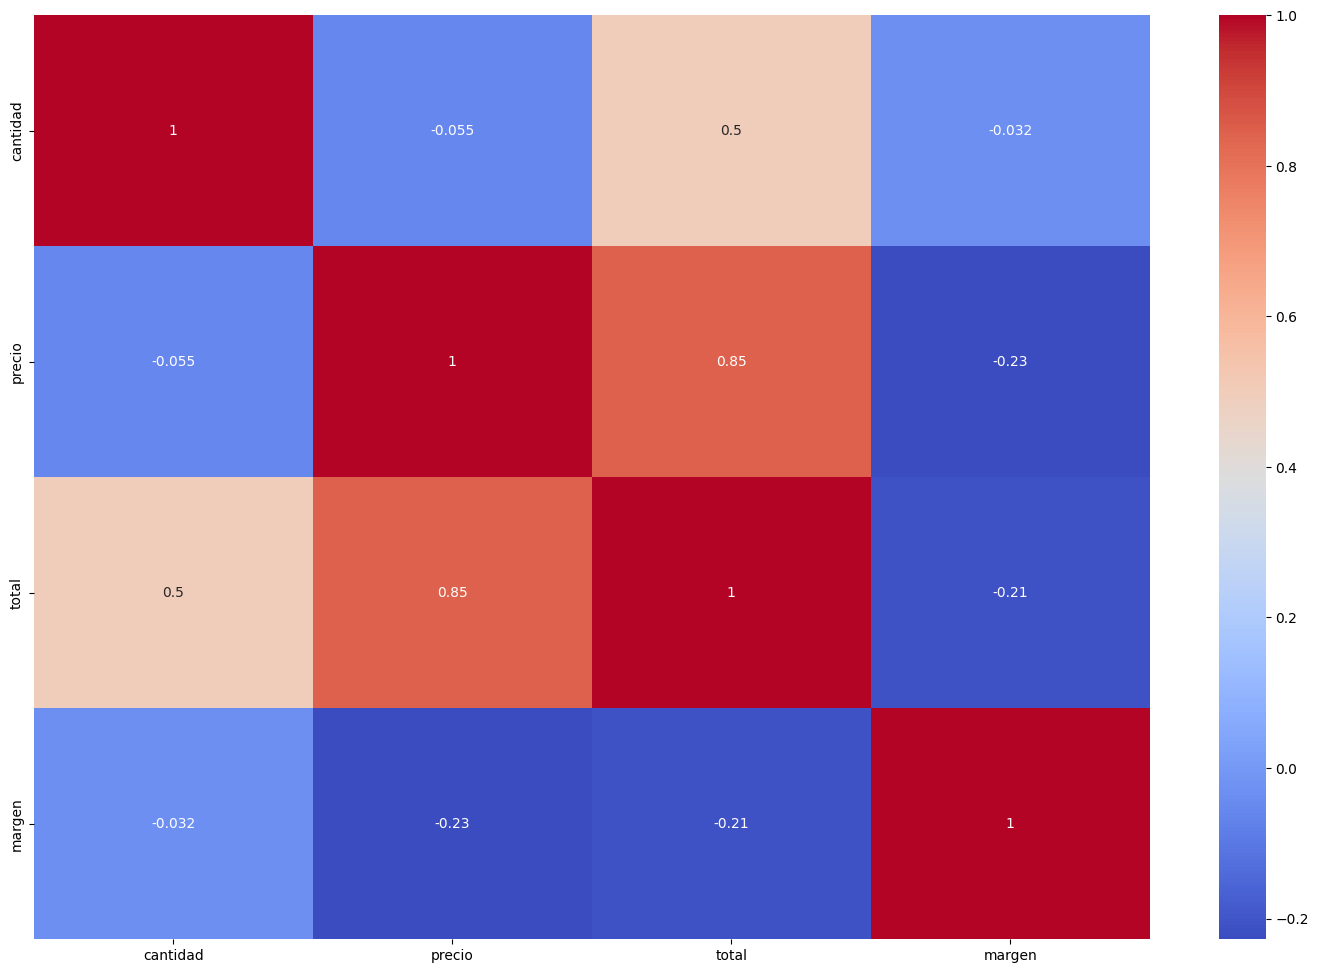

In [11]:
plt.figure(figsize=(18,12))
corr = total_data[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

Este código crea un mapa de calor que muestra cómo se relacionan entre sí las variables numéricas del conjunto de datos, ayudando a identificar qué factores están más conectados o influyen unos en otros.

El gráfico muestra que existe una fuerte relación entre el precio y el total de venta, además de una conexión moderada entre el total y la cantidad. En cambio, el margen no tiene una correlación clara con las demás variables.

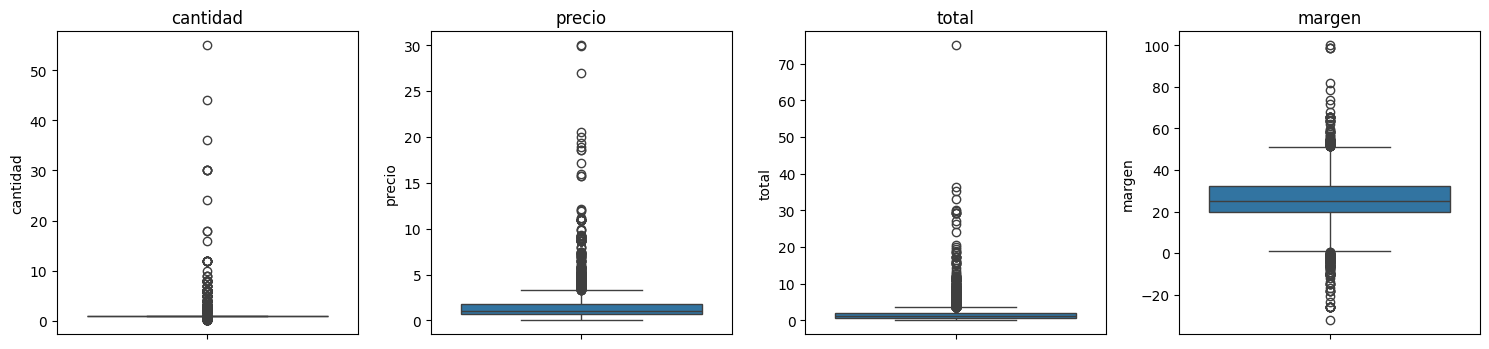

In [12]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)  # Ajustar filas/columnas según cantidad de variables
    sns.boxplot(y=total_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Este código crea diagramas de caja para cada variable numérica, permitiendo visualizar cómo se distribuyen los datos y detectar fácilmente la presencia de valores atípicos o extremos.

Los gráficos muestran que todas las variables numéricas tienen varios valores atípicos. La mayoría de los datos están concentrados en valores bajos, pero existen algunos productos o ventas con cantidades, precios y totales mucho más altos que el promedio.

In [13]:
num_cols = total_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Revisión de outliers por IQR
for col in num_cols:
    Q1 = total_data[col].quantile(0.25)
    Q3 = total_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers_count = ((total_data[col] < lower_limit) | (total_data[col] > upper_limit)).sum()
    print(f"{col}: {outliers_count} outliers")

cantidad: 905 outliers
precio: 348 outliers
total: 806 outliers
margen: 243 outliers


Este código calcula cuántos valores atípicos tiene cada variable numérica usando el método del rango intercuartílico (IQR), ayudando a identificar datos que se alejan demasiado del comportamiento normal.

In [14]:
# TENEMOS QUE GUARDARNOS TODOS LOS DATASETS, ESTO SIGNIFICA:

total_data_CON_outliers = total_data.copy()

total_data_SIN_outliers = total_data.copy()
# Para cada una de las variables con outliers en mi problema, tengo que reemplazar sus valores del DF

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: (x if (x <= upper_limit) else upper_limit) if not pd.isna(x) else np.nan)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: (x if (x >= lower_limit) else lower_limit) if not pd.isna(x) else np.nan)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ['cantidad','precio','total', 'margen']:
  total_data_SIN_outliers, limit_list = replace_outliers_from_column(column, total_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'cantidad': [1.0, 1.0],
 'precio': [0.0, 3.325],
 'total': [0.0, 3.5999999999999996],
 'margen': [0.649999999999963, 51.45000000000003]}

Este código crea dos versiones del conjunto de datos: una con los valores originales y otra donde se ajustan los valores atípicos para mantenerlos dentro de un rango razonable. Usa el método del rango intercuartílico (IQR) para detectar y limitar los valores extremos en las columnas numéricas.

In [19]:
from sklearn.model_selection import train_test_split

# ============================
# División en Train y Test
# ============================

# Usamos el dataset sin outliers
df = total_data_SIN_outliers.copy()

# Tickets únicos
tickets = df["ticket"].unique()

# Dividir en 80% train, 20% test
train_tickets, test_tickets = train_test_split(
    tickets, test_size=0.2, random_state=42
)

# Crear datasets
df_train1 = df[df["ticket"].isin(train_tickets)].copy()
df_test1 = df[df["ticket"].isin(test_tickets)].copy()

print("✅ División realizada")
print(f"Tickets en TRAIN: {df_train1['ticket'].nunique()} ({len(df_train1)} líneas)")
print(f"Tickets en TEST: {df_test1['ticket'].nunique()} ({len(df_test1)} líneas)")

✅ División realizada
Tickets en TRAIN: 5012 (10882 líneas)
Tickets en TEST: 1254 (2366 líneas)


Este código divide los datos en dos grupos: uno para entrenar los modelos (80%) y otro para probarlos (20%). La división se hace usando los números de ticket, de modo que cada venta completa quede en un solo grupo y no se repita.

In [ ]:
import joblib

# Guardar los DataFrames procesados
joblib.dump(df_train1, "df_train1.pkl")
joblib.dump(df_test1, "df_test1.pkl")

print("✅ Datasets guardados correctamente:")
print(" - df_train1.pkl")
print(" - df_test1.pkl")

✅ Datasets guardados correctamente:
 - df_train.pkl
 - df_test.pkl


Este código guarda los conjuntos de datos de entrenamiento y prueba en archivos .pkl, para poder usarlos más adelante sin tener que volver a procesar toda la información.

___

# BLOQUE 2 - PROMOCIONES INTELIGENTES EDA#2

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

total_data2 = pd.read_csv("ventas_anuales1.csv")
total_data2.head()

,codigo,producto,familia,cantidad,coste,venta,margen_coste,margen_venta,beneficio,familia_legible
0,006928,NaN,NaN,0.0,0.00,0.00,1,1,0.00,otros
1,221505,NaN,NaN,2.0,1.44,2.00,0.26262626262626404,0.208000000000001,0.56,otros
2,063556,* ACEITUNA EL,AQ JV,9.0,11.48,17.07,0.35182926829268296,0.260261614794768,5.59,otros
3,035147,* ACEITUNA,AQ JV,2.0,4.98,6.59,0.20299379335523898,0.16874051593323197,1.61,otros
4,013125,* ACEITUNA,AQ JV,44.0,30.69,48.65,0.44109718889777594,0.306084275436794,17.96,otros


Este código carga un nuevo archivo con las ventas anuales del supermercado y muestra las primeras filas para revisar cómo vienen organizados los datos.

In [24]:
total_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   codigo           2932 non-null   object 
 1   producto         2816 non-null   object 
 2   familia          2797 non-null   object 
 3   cantidad         2762 non-null   float64
 4   coste            2762 non-null   float64
 5   venta            2762 non-null   float64
 6   margen_coste     2934 non-null   object 
 7   margen_venta     2876 non-null   object 
 8   beneficio        2762 non-null   float64
 9   familia_legible  3035 non-null   object 
dtypes: float64(4), object(6)
memory usage: 237.2+ KB


Este código muestra un resumen general del nuevo conjunto de datos, indicando cuántas filas y columnas tiene, los tipos de datos en cada una y si existen valores faltantes.

In [25]:
total_data2.describe().T

,count,mean,std,min,25%,50%,75%,max
cantidad,2762.0,94.452147,2523.170415,0.00,3.97150,11.000,31.00000,130438.415000
coste,2762.0,85.371393,2250.534669,-23.13,5.93550,16.255,39.76905,117897.893327
venta,2762.0,124.306894,3278.155423,-66.00,9.00000,23.850,57.85000,171667.820176
beneficio,2762.0,38.935501,1027.781432,-66.00,2.75775,7.390,17.78750,53769.926849


Este código muestra estadísticas generales de las columnas numéricas, como el promedio, los valores mínimos y máximos, y la variación de los datos, para entender mejor el comportamiento de las ventas anuales.

In [29]:
total_data2.duplicated().sum()
total_data2 = total_data2.drop_duplicates().reset_index(drop = True)
total_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   codigo           2819 non-null   object 
 1   producto         2760 non-null   object 
 2   familia          2741 non-null   object 
 3   cantidad         2762 non-null   float64
 4   coste            2762 non-null   float64
 5   venta            2762 non-null   float64
 6   margen_coste     2821 non-null   object 
 7   margen_venta     2820 non-null   object 
 8   beneficio        2762 non-null   float64
 9   familia_legible  2822 non-null   object 
dtypes: float64(4), object(6)
memory usage: 220.6+ KB


Este código revisa si hay filas repetidas en el archivo de ventas anuales, elimina los duplicados y muestra nuevamente la información general del conjunto de datos ya limpio.

In [30]:
num_cols = total_data2.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = total_data2.select_dtypes(include=['object']).columns.tolist()

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

Numéricas: ['cantidad', 'coste', 'venta', 'beneficio']
Categóricas: ['codigo', 'producto', 'familia', 'margen_coste', 'margen_venta', 'familia_legible']


Este código separa las columnas del archivo en dos grupos: las que contienen números y las que contienen texto, para facilitar los análisis posteriores según el tipo de dato.

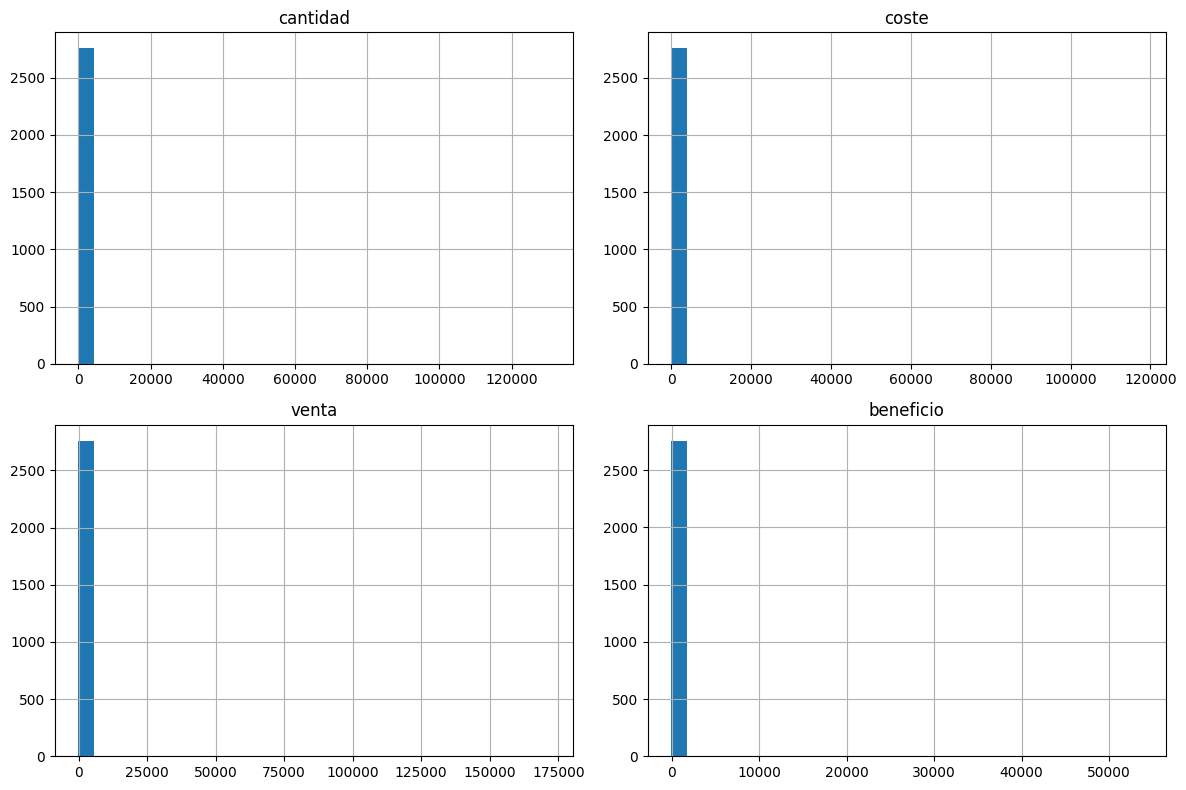

In [51]:
# Histogramas de variables numéricas
total_data2[num_cols].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

Este código genera gráficos de barras para cada variable numérica, mostrando cómo se distribuyen los valores y ayudando a detectar concentraciones o posibles valores atípicos en las ventas anuales.

Los histogramas muestran que la mayoría de las ventas, costes y beneficios están concentrados en valores bajos, mientras que hay pocos casos con cifras muy altas, lo que indica la presencia de valores atípicos o productos con rendimientos excepcionales.

vemos tambien que todos estan en 0 esto puede deberse a que las cantidades sean menores a 0 o a su vez a una cantidad de outliers que pueda estar afectando a los datos esto lo comprobaremos un par de pasos mas adelante con los graficos de caja y ahi evidenciaremos cual seria la causa de esto.

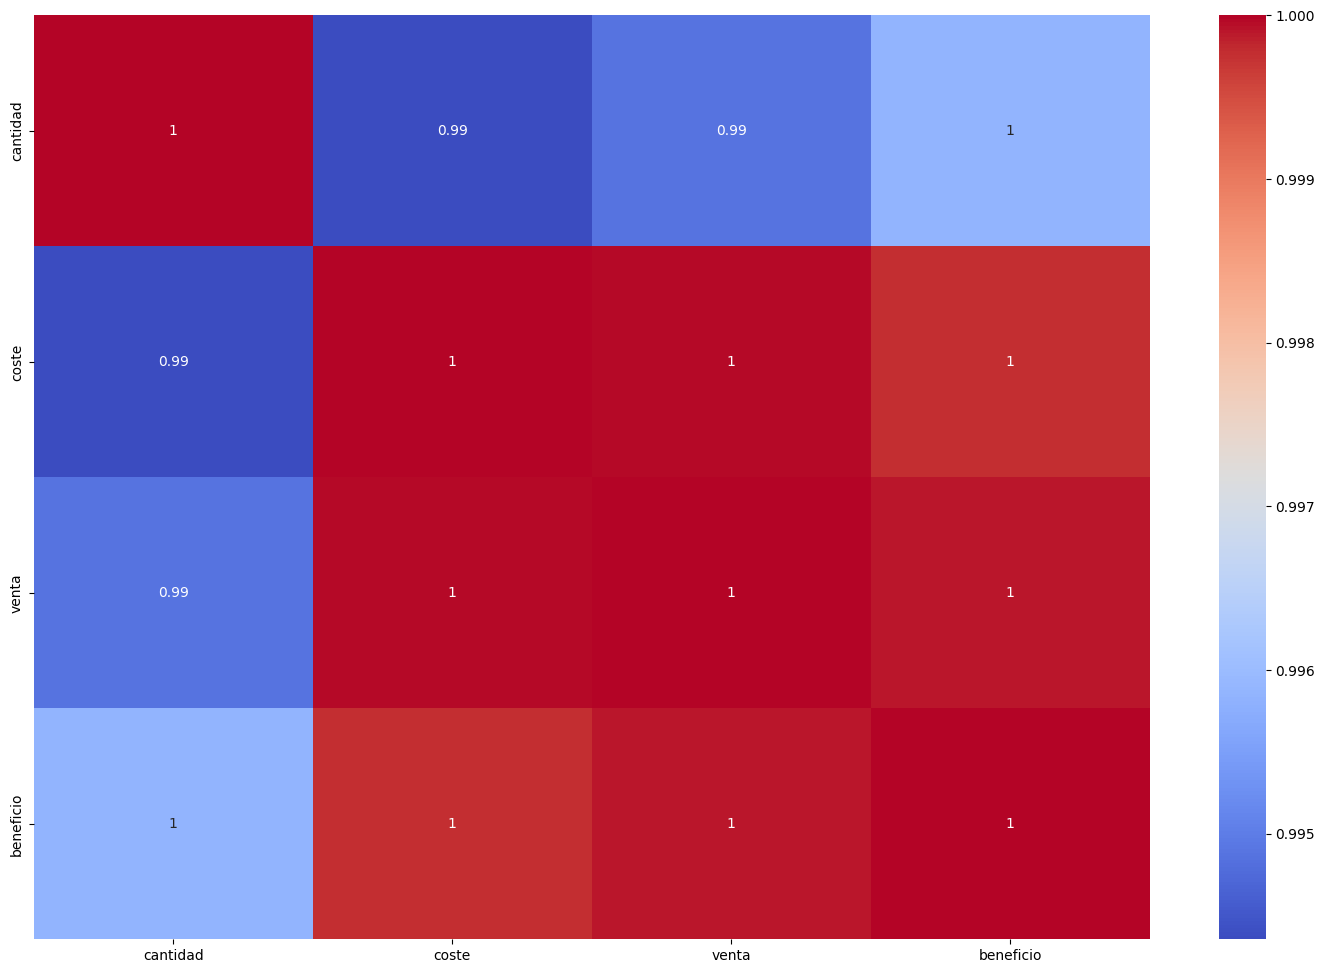

In [39]:
plt.figure(figsize=(18,12))
corr = total_data[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

Este código genera un mapa de calor que muestra la relación entre las variables numéricas del conjunto de datos, ayudando a identificar cuáles se mueven juntas o dependen unas de otras.

El mapa de calor muestra que todas las variables numéricas están fuertemente relacionadas entre sí, especialmente coste, venta y beneficio, lo que indica que cuando aumenta una, las demás también lo hacen casi en la misma proporción.

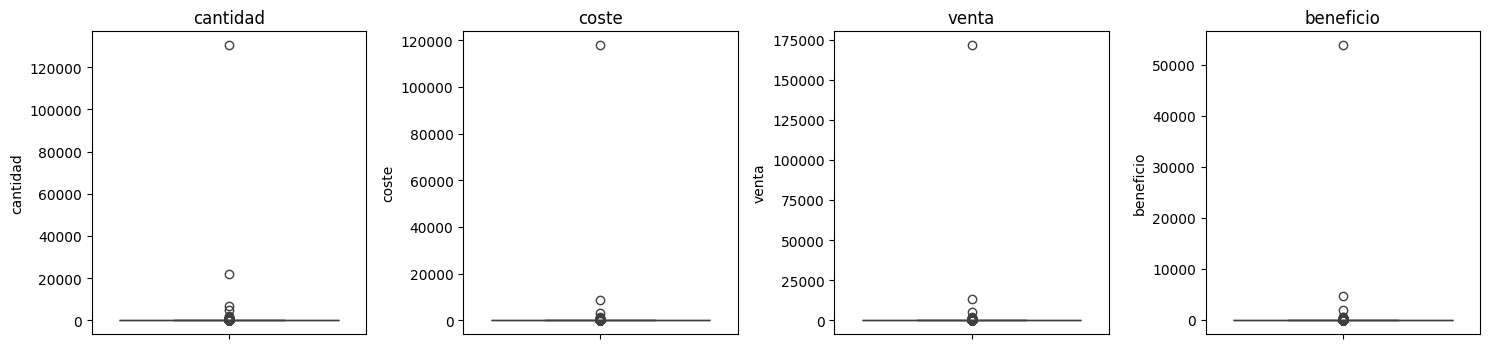

In [40]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)  # Ajustar filas/columnas según cantidad de variables
    sns.boxplot(y=total_data2[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Este código crea diagramas de caja para las variables numéricas del conjunto de ventas anuales, permitiendo ver la distribución de los datos y detectar fácilmente los valores atípicos en cada variable.

Los diagramas de caja muestran que todas las variables tienen varios valores extremadamente altos comparados con el resto, lo que confirma la presencia de outliers en cantidad, coste, venta y beneficio.

In [42]:
num_cols = total_data2.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Revisión de outliers por IQR
for col in num_cols:
    Q1 = total_data2[col].quantile(0.25)
    Q3 = total_data2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers_count = ((total_data2[col] < lower_limit) | (total_data2[col] > upper_limit)).sum()
    print(f"{col}: {outliers_count} outliers")

cantidad: 293 outliers
coste: 268 outliers
venta: 269 outliers
beneficio: 246 outliers


Este código calcula cuántos valores atípicos tiene cada variable numérica en el conjunto de ventas anuales, usando el método del rango intercuartílico (IQR) para detectar datos que se alejan demasiado del comportamiento normal.

In [44]:
# TENEMOS QUE GUARDARNOS TODOS LOS DATASETS, ESTO SIGNIFICA:

total_data2_CON_outliers = total_data2.copy()

total_data2_SIN_outliers = total_data2.copy()
# Para cada una de las variables con outliers en mi problema, tengo que reemplazar sus valores del DF

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: (x if (x <= upper_limit) else upper_limit) if not pd.isna(x) else np.nan)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: (x if (x >= lower_limit) else lower_limit) if not pd.isna(x) else np.nan)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ['cantidad', 'coste', 'venta', 'beneficio']:
  total_data_SIN_outliers, limit_list = replace_outliers_from_column(column, total_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'cantidad': [0.0, 71.54275],
 'coste': [-23.13, 90.519375],
 'venta': [-66.0, 131.125],
 'beneficio': [-66.0, 40.33212499999999]}

Este código crea una versión limpia del conjunto de ventas donde se ajustan los valores extremos de las columnas numéricas. Usa el método del rango intercuartílico (IQR) para limitar los datos a un rango razonable y evitar que los outliers distorsionen los análisis.

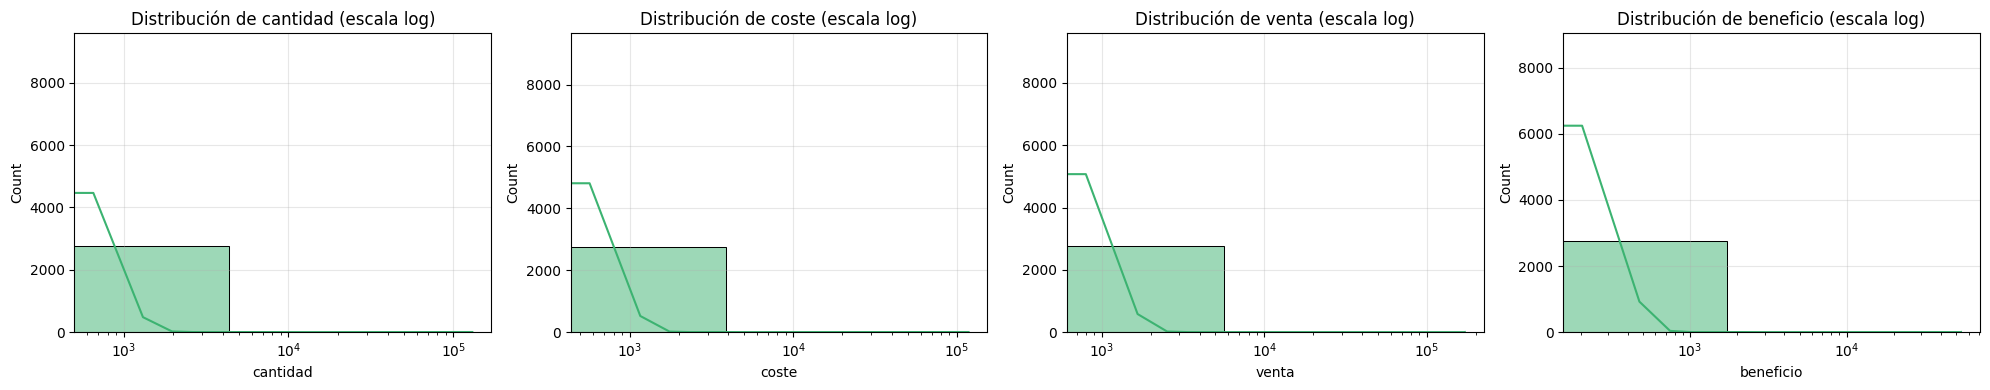

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ------------------------------
# 1. Seleccionar las columnas numéricas clave
# ------------------------------
cols_vis = ["cantidad", "coste", "venta", "beneficio"]

# ------------------------------
# 2. Usar el dataset sin outliers
# ------------------------------
df_plot = total_data2_SIN_outliers[cols_vis].copy()

# ------------------------------
# 3. Crear histogramas comparativos
# ------------------------------
fig, axes = plt.subplots(nrows=1, ncols=len(cols_vis), figsize=(5*len(cols_vis), 4))

for i, col in enumerate(cols_vis):
    sns.histplot(df_plot[col], bins=30, kde=True, ax=axes[i], color="mediumseagreen")
    axes[i].set_title(f"Distribución de {col} (escala log)")
    axes[i].set_xscale('log')  # 👈 escala logarítmica
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Este código muestra histogramas de las variables numéricas principales después de limpiar los outliers. Usa una escala logarítmica para visualizar mejor los valores, destacando la distribución real de los datos y evitando que los valores altos distorsionen los gráficos.

Los histogramas en escala logarítmica muestran que la mayoría de los productos tienen valores bajos en cantidad, coste, venta y beneficio, mientras que solo unos pocos alcanzan cifras muy altas, confirmando que los datos están concentrados en un rango reducido.

In [57]:

from sklearn.model_selection import train_test_split



df = total_data2_SIN_outliers.copy()


df_train2, df_test2 = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

print("✅ División realizada correctamente")
print(f"Filas en TRAIN: {len(df_train2)}")
print(f"Filas en TEST:  {len(df_test2)}")





✅ División realizada correctamente
Filas en TRAIN: 2257
Filas en TEST:  565


Este código divide el conjunto de datos limpio (sin outliers) en dos partes: una para entrenar modelos (80%) y otra para probarlos (20%), garantizando una separación aleatoria y equilibrada.

In [58]:
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
print("\nColumnas numéricas a escalar:", num_cols.tolist())

scaler = StandardScaler()

df_train_scaled2 = df_train2.copy()
df_test_scaled2 = df_test2.copy()

df_train_scaled2[num_cols] = scaler.fit_transform(df_train2[num_cols])
df_test_scaled2[num_cols] = scaler.transform(df_test2[num_cols])

print("\n✅ Escalado realizado correctamente")


Columnas numéricas a escalar: ['cantidad', 'coste', 'venta', 'beneficio']

✅ Escalado realizado correctamente


Este código estandariza las variables numéricas del conjunto de datos, ajustándolas a una misma escala (media 0 y desviación estándar 1) para que todas tengan el mismo peso al entrenar modelos.

In [59]:
import joblib

joblib.dump(scaler, "scaler.pkl")
joblib.dump(df_train_scaled2, "df_train_scaled2.pkl")
joblib.dump(df_test_scaled2, "df_test_scaled2.pkl")

print("💾 Escalador y datasets escalados guardados correctamente.")

💾 Escalador y datasets escalados guardados correctamente.


Este código guarda el escalador y los conjuntos de datos ya normalizados en archivos .pkl, para poder reutilizarlos después sin tener que repetir el proceso de escalado.